<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: Pourna Sengupta


***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [569]:
import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sb
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [570]:
filepath = '/Users/pournasengupta/Dropbox/csci3022/homework/homework2/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [571]:
#Your Code here
def chanceOfSurvival(): 
    numS = df["Survived"].tolist()
    population = df.shape[0]
    count = 0
    r = range(0, population)
    for i in r: 
        if (numS[i] == 1):
            count += 1
    
    probability = (count / population) * 100
        
    print(probability,"%")
    
    
chanceOfSurvival()

39.28170594837261 %


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Typeset your responses here**

If class warfare took place, most survivors would be in class 1, a few may be in class 2, but it would be expected that almost none of the survivors were in class 3. If male chivlary took place, the majority of survivors are expected to be female and children, and most of the men would have died. These cases are not mutually exclusive. It is completely possible that the majority of survivors were both class 1 passengers and female or children. This would mean that though female and children were given priority, leaving most of the males to perish, those in class 1 received priority, and if there was not enough lifeboats, those in class 2 and 3 would be less likely to secure a lifeboat spot and survive. 

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [572]:
#Your Code here
dfTitanic = df.dropna(subset=['Survived', 'Pclass', 'Age', 'Sex'])
print("Titanic data frame length:", len(df), "\nClean Titanic data frame length:", len(dfTitanic), "\n# of Rows Removed: ", (len(df) - len(dfTitanic)))
            

Titanic data frame length: 891 
Clean Titanic data frame length: 714 
# of Rows Removed:  177


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [573]:
#Your Code here
ifSurvived = df["Survived"].tolist()
population = df.shape[0]
classP = df["Pclass"].tolist()
genderP = df["Sex"].tolist()

    
def survivalClass(): 
    first = 0
    second = 0
    third = 0
    r = range(0, population)
    for i in r: 
        if (ifSurvived[i] == 1):
            if (classP[i] == 1):
                first += 1
            elif (classP[i] == 2): 
                second += 1
            else:
                third += 1
    
    pFirst = (first / population) * 100
    pSecond = (second / population) * 100
    pThird = (third / population) * 100
        
    print("First Class: ", pFirst, "%\nSecond Class: ", pSecond, "%\nThird Class: ", pThird, "%\n")
    
    
def survivalGender(): 
    male = 0
    female = 0
    r = range(0, population)
    for i in r: 
        if (ifSurvived[i] == 1): 
            if(genderP[i] == "male"): 
                male += 1
            else: 
                female += 1
    pMale = (male / population) * 100 
    pFemale = (female / population) * 100
    
    print("Male: ", pMale, "%\nFemale: ", pFemale, "%\n")
    
def survivalCombo(): 
    firstM = 0
    secondM = 0
    thirdM = 0
    firstF = 0
    secondF = 0 
    thirdF = 0
    
    r = range(0, population)
    for i in r: 
        if(ifSurvived[i] == 1):
            if(genderP[i] == "male"): 
                if (classP[i] == 1):
                    firstM += 1
                elif (classP[i] == 2): 
                    secondM += 1
                else:
                    thirdM += 1
                    
            else: 
                if (classP[i] == 1):
                    firstF += 1
                elif (classP[i] == 2): 
                    secondF += 1
                else:
                    thirdF += 1
     
    pMale1 = (firstM / population) * 100 
    pMale2 = (secondM / population) * 100
    pMale3 = (thirdM / population) * 100
    
    pFem1 = (firstF / population) * 100
    pFem2 = (secondF / population) * 100
    pFem3 = (thirdF / population) * 100
    
    print("First Class \n ----------------- \n Male: ", pMale1, "%\nFemale: ", pFem1, "%\n")
    print("Second Class \n ----------------- \n Male: ", pMale2, "%\nFemale: ", pFem2, "%\n")
    print("Third Class \n ----------------- \n Male: ", pMale3, "%\nFemale: ", pFem3, "%\n")
survivalClass()
survivalGender()
survivalCombo()

First Class:  15.375982042648708 %
Second Class:  10.1010101010101 %
Third Class:  13.804713804713806 %

Male:  12.794612794612794 %
Female:  26.487093153759822 %

First Class 
 ----------------- 
 Male:  5.16273849607183 %
Female:  10.21324354657688 %

Second Class 
 ----------------- 
 Male:  2.132435465768799 %
Female:  7.968574635241302 %

Third Class 
 ----------------- 
 Male:  5.499438832772166 %
Female:  8.305274971941639 %



**Typeset your responses here**

Base Survival Probability: 39.28% 

(i) The sum of the first, second, and third class survival probabilities is equal to the base survival probability. This makes sense because even though the population is divided into these 3 (passenger class) categories instead of the 2 in the base case (if the passenger survived, 1/0), the percentage of the population that survived does not change. 

(ii) Similarly, the sum of the gender probabilities also equals the base survival probability for the same reason. 

(iii) In this case, there are 2 notable sums. The first is the sum of the male and female probabilities for each class. The sum of these probabilities (ex. 1st class Male + Female) is equal to the survival probability of the first class as a whole. The second sum is the sum of each of the class/gender sums. This sum equals 39.28%, as expected since all surviving passengers are included in the probability. 

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

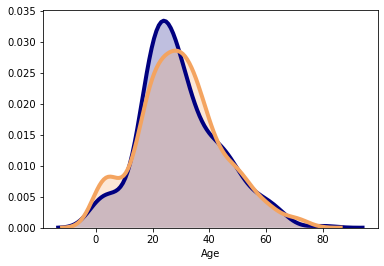

In [574]:
my_bins = range(0,80,5)
#Your Code here
ages = df["Age"].tolist()



dfByAge = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
dfSurvived = dfByAge[dfByAge.Survived == 1]
dfDied = dfByAge[dfByAge.Survived == 0]
#print(dfByAge)   
#print(dfSurvived)
#print(dfDied)

#navy fc=(2, 69, 151, 0.58)
#sandybrown fc=(161, 113, 2, 0.58)
def plotSurvived(): 
    sb.distplot(dfSurvived['Age'], hist=False, kde=True, 
             bins=my_bins, color='navy', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
    
def plotDied():
    sb.distplot(dfDied['Age'], hist=False, kde=True, 
             bins=my_bins, color='sandybrown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
    
    
plotSurvived()
plotDied()

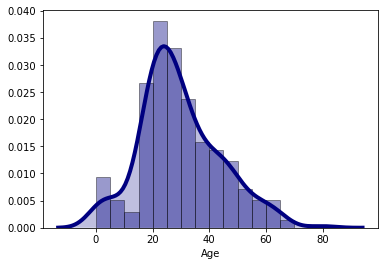

In [575]:
def plotSurvived(): 
    sb.distplot(dfSurvived['Age'], hist=True, kde=True, 
             bins=my_bins, color='navy', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
    
plotSurvived()


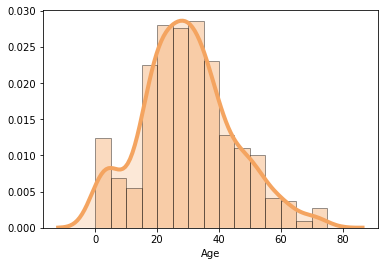

In [576]:

def plotDied():
    sb.distplot(dfDied['Age'], hist=True, kde=True, 
             bins=my_bins, color='sandybrown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
    
    
plotDied()

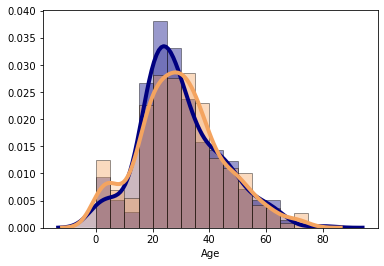

In [577]:
def plotSurvived(): 
    sb.distplot(dfSurvived['Age'], hist=True, kde=True, 
             bins=my_bins, color='navy', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
    
def plotDied():
    sb.distplot(dfDied['Age'], hist=True, kde=True, 
             bins=my_bins, color='sandybrown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
    
    
plotSurvived()
plotDied()

**Typeset your responses here**
The histogram above suggests that passengers between the ages of 55 and 70 were more likely to survive than those of a younger or older age. This is seen by the difference between the number of surviving and deceased passengers. 

Example: For those between 30 and 35 years old, for every passenger that survived, two others perished. Instead, for those between the ages of 55 and 70, about only one passenger for every 

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Typeset your responses here**
A frequency histogram would be the number of passengers in each bin on the y axis. The sum of all y values would equal the total number of passengers. In a density histogram, the y values are the density (# of X y/o survivors / total passengers). The sum of all y values in a density histogram equals 1. 

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Typeset your responses here**
Based off the data analysis from the computations done above, it seems that there was some class warfare and male chivalry. Men of all classes were less likely to survive than women in any all gender and class combinations. Women in first class were more likely to survive than those in second and third classes, and women in the second class were least likely to survive out of the 3. Overall a mix of both male chivlary and class warfare resulted in first class women have the highest likelihood of survival. 

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [578]:
dfPrecip = pd.read_csv('/Users/pournasengupta/Dropbox/csci3022/homework/homework2/boulder_precip_12021.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [579]:
#Your code here

def replaceTr(): 
    years = dfPrecip.shape[0]
    months = dfPrecip.shape[1]
    r = range(0, years)
    m = range(0, months)
    
    for i in r: 
        for j in m:   
            if(dfPrecip.iat[i, j] == 'Tr'): 
                dfPrecip.iat[i, j] = 0.0
            if(type(dfPrecip.iat[i, j]) == str): 
                if(dfPrecip.iat[i, j].endswith('*')):
                   dfPrecip.iat[i, j] = dfPrecip.iat[i, j][:-1]
                dfPrecip.iat[i, j] = float(dfPrecip.iat[i, j])
                     
replaceTr()
dfPrecip = dfPrecip.drop([121, 1])
dfPrecip = dfPrecip.drop(['Year'], axis = 1)
dfPrecip = dfPrecip.drop(['YEAR TOTAL'], axis = 1)
dfPrecip = dfPrecip.astype(str).astype(float)
#dfPrecip['JAN'] = pd.to_numeric(dfPrecip['JAN'])

#dfPrecip = dfPrecip.astype('float64')
print(dfPrecip)
dfPrecip.dtypes

      JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
0    0.40  1.06  0.75  9.18  1.84  0.49  0.48  0.22  1.54  0.13  0.19  0.61
2    0.37  0.48  1.48  1.01  2.32  1.46  1.26  0.53  5.46  1.44  1.29  1.34
3    0.08  1.52  1.45  2.31  2.02  1.87  0.95  1.46  1.31  3.43  0.15  0.16
4    0.09  0.31  2.37  1.45  5.35  2.72  1.05  1.00  1.60  1.06  0.08  0.70
5    0.81  0.70  1.85  6.65  4.78  0.55  1.86  0.22  1.64  2.54  0.23  0.00
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
116  0.37  1.44  3.84  3.34  2.01  2.37  0.61  1.06  0.45  0.38  0.47  0.91
117  1.41  0.73  1.45  3.15  6.29  0.45  1.30  1.62  1.92  2.42  0.57  0.68
118  0.74  1.04  2.23  1.35  4.76  1.82  1.84  0.24  1.02  2.68  1.19  0.34
119  1.57  0.74  2.83  1.87  3.89  2.12  2.21  0.10  0.56  2.42  2.38  0.35
120  0.00  2.19  2.88  3.17  2.30  2.10  0.34  0.48  1.56  0.77  0.79  0.52

[120 rows x 12 columns]


JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object

**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

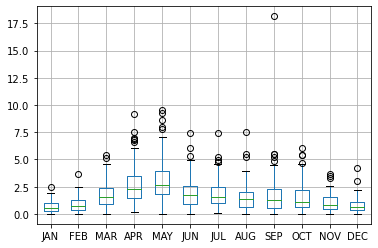

In [580]:
#Your code here
bplots = dfPrecip
bplots.boxplot(grid='True')



**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

In [581]:
#Your code here
springDf = dfPrecip.drop(['JAN', 'FEB', 'JUL', 'AUG', 'OCT', 'NOV', 'DEC'], axis = 1)

march_may = springDf['MAR'] + springDf['APR'] + springDf['MAY']
springDf['MAR-MAY'] = march_may / 3

apr_jun = springDf['APR'] + springDf['MAY'] + springDf['JUN']
springDf['APR-JUN'] = apr_jun / 3
print(springDf)


      MAR   APR   MAY   JUN   SEP   MAR-MAY   APR-JUN
0    0.75  9.18  1.84  0.49  1.54  3.923333  3.836667
2    1.48  1.01  2.32  1.46  5.46  1.603333  1.596667
3    1.45  2.31  2.02  1.87  1.31  1.926667  2.066667
4    2.37  1.45  5.35  2.72  1.60  3.056667  3.173333
5    1.85  6.65  4.78  0.55  1.64  4.426667  3.993333
..    ...   ...   ...   ...   ...       ...       ...
116  3.84  3.34  2.01  2.37  0.45  3.063333  2.573333
117  1.45  3.15  6.29  0.45  1.92  3.630000  3.296667
118  2.23  1.35  4.76  1.82  1.02  2.780000  2.643333
119  2.83  1.87  3.89  2.12  0.56  2.863333  2.626667
120  2.88  3.17  2.30  2.10  1.56  2.783333  2.523333

[120 rows x 7 columns]


**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [582]:
#Code here

#Mean 
def mean(x): 
    n = x.size
    arrSum = 0
    for i in range(n): 
        arrSum = arrSum + x[i]
        mean = arrSum / n
    return mean

#Tukey 5 Number Summary 
def numSum(x): 
    q = percentile(x, [25, 50, 75])
    
    minX = x.min()
    maxX = x.max()
    q1 = q[0]
    median = q[1]
    q3 = q[2]
    
    print("Tukey 5 Number Summary \n --------------------- \n")
    print("Minimum: ", minX)
    print("\nQ1: ", q1)
    print("\nMedian: ", median)
    print("\nQ2: ", q3)
    print("\nMaximum: ", maxX)
    print("\nMax - Min: ", (maxX-minX))
    
    

def main(): 
    group1 = springDf['MAR-MAY'].to_numpy()
    group2 = springDf['APR-JUN'].to_numpy()
    
    mean1 = mean(group1)
    mean2 = mean(group2)

    sd1 = np.std(group1)
    sd2 = np.std(group2)
    
    print("MARCH - MAY\n--------------------- \n")
    print("Mean: ", mean1)
    print("\nStandard Deviation: ", sd1)
    numSum(group1)
    print("\n")
    
    print("APRIL - JUNE\n--------------------- \n")
    print("Mean: ", mean2)
    print("\nStandard Deviation: ", sd2)
    numSum(group2)
    print("\n")
    
main()

MARCH - MAY
--------------------- 

Mean:  2.510444444444444

Standard Deviation:  0.9087615640237617
Tukey 5 Number Summary 
 --------------------- 

Minimum:  0.7366666666666667

Q1:  1.8658333333333332

Median:  2.376666666666667

Q2:  3.058333333333333

Maximum:  5.583333333333333

Max - Min:  4.846666666666667


APRIL - JUNE
--------------------- 

Mean:  2.562527777777778

Standard Deviation:  0.9755654576661466
Tukey 5 Number Summary 
 --------------------- 

Minimum:  1.04

Q1:  1.7408333333333335

Median:  2.465

Q2:  3.160833333333333

Maximum:  6.3566666666666665

Max - Min:  5.316666666666666




**Typeset your analysis to part D in this cell or cells**
The standard deviation of March to May is less than that of April to June, therefore making it a more reliable data set. The difference between the max and min also show that the data in April to June has a larger range. The rest of the values do not differ from each other significantly. 

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

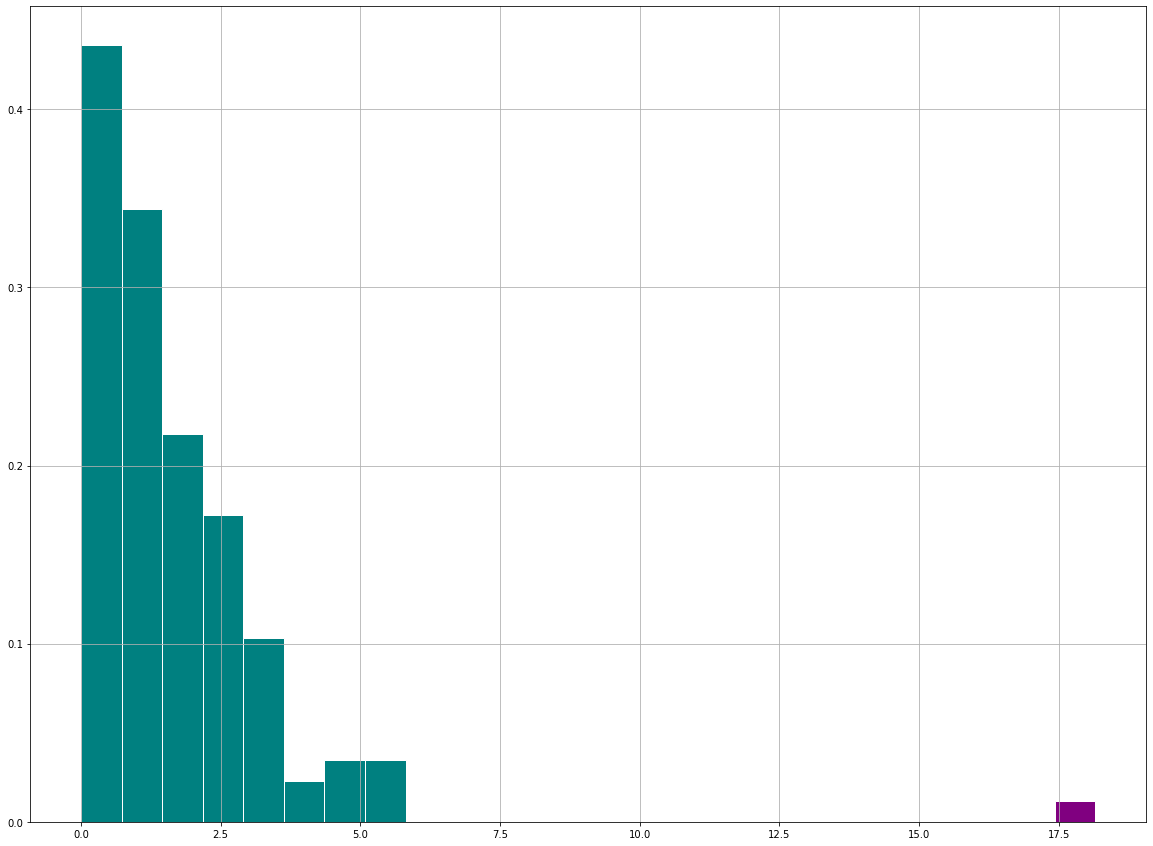

In [594]:
# September box plot code here
fig, ax = plt.subplots(figsize=(20,15))
N, bins, patches = ax.hist(dfPrecip['SEP'], edgecolor='white',bins=25, color='teal', linewidth=1,density=True)
for i in range(17, len(patches)):
    patches[i].set_facecolor('purple')
ax.grid()

**Typeset your analysis for part E in this cell or cells**
The data set skews left, with singular modality. The outlier, in 2013, is precipitation of 18.16. 

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [584]:
# September code here
#Code here
#Mean 
def mean(x): 
    n = x.size
    arrSum = 0
    for i in range(n): 
        arrSum = arrSum + x[i]
        mean = arrSum / n
    return mean

def main(): 
    sepDf = dfPrecip['SEP'] 
    group1 = sepDf.to_numpy()
    sepDf = sepDf.drop([113, 0])
    group2 = sepDf.to_numpy()
    mean1 = mean(group1)
    mean2 = mean(group2)
    sd1 = np.std(group1)
    sd2 = np.std(group2)
    
    print("SEPTEMBER\n--------------------- \n")
    print("Mean: ", mean1)
    print("\nStandard Deviation: ", sd1)
    
    print("\n\nSEPTEMBER (2013 removed)\n--------------------- \n")
    print("Mean: ", mean2)
    print("\nStandard Deviation: ", sd2)
  
    
main()

SEPTEMBER
--------------------- 

Mean:  1.7011666666666663

Standard Deviation:  1.9701625073976907


SEPTEMBER (2013 removed)
--------------------- 

Mean:  1.5630508474576268

Standard Deviation:  1.277625915698873


**Typeset your analysis for part F in this cell or cells**

The average weather in the September is relatively dry. The mean is much lower than that of Spring months but the standard deviation is greater, meaning that the weather varies slightly more. This makes sense because during the spring months, there is likely precipitation on a majority of the days. In the Fall, only a few days may have precipitation, therefore, increasing the standard deviation when computed with days of little to no precipitation. 

[Back to top](#top)